further refer: https://www.kaggle.com/code/shtrausslearning/nlp-edx-course-recommendations#6-%7C-PUTTING-TOGETHER-RECOMMENDER-CLASS


In [50]:
import json
import pandas as pd
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from spacy.lang.en.examples import sentences 
pd.set_option('display.max_colwidth', None)

In [5]:

# Load the JSON file to inspect its structure
with open('archive/all_prerequisites.json') as file:
    data = json.load(file)

# Display the type of the loaded data and keys if it's a dictionary
data_type = type(data)
keys = data.keys() if isinstance(data, dict) else "Not a dictionary"

data_type, keys


(dict,
 dict_keys(['PSYC 1', 'PSYC 2', 'PSYC 3', 'PSYC 4', 'PSYC 6', 'PSYC 7', 'PSYC 60', 'PSYC 70', 'PSYC 71', 'PSYC 81', 'PSYC 87', 'PSYC 88', 'PSYC 90', 'PSYC 93', 'PSYC 99', 'PSYC 100', 'PSYC 101', 'PSYC 102', 'PSYC 104', 'PSYC 105', 'PSYC 106', 'PSYC 108', 'PSYC 110', 'PSYC 111A', 'PSYC 111B', 'PSYC 113', 'PSYC 114', 'PSYC 115A', 'PSYC 115B', 'PSYC 116', 'PSYC 117', 'PSYC 120', 'PSYC 121', 'PSYC 122', 'PSYC 123', 'PSYC 124', 'PSYC 125', 'PSYC 126', 'PSYC 128', 'PSYC 129', 'PSYC 130', 'PSYC 131', 'PSYC 132', 'PSYC 133', 'PSYC 134', 'PSYC 136', 'PSYC 137', 'PSYC 138', 'PSYC 139', 'PSYC 140', 'PSYC 141', 'PSYC 142', 'PSYC 143', 'PSYC 144', 'PSYC 145', 'PSYC 146', 'PSYC 147', 'PSYC 148', 'PSYC 150', 'PSYC 151', 'PSYC 152', 'PSYC 153', 'PSYC 154', 'PSYC 155', 'PSYC 156', 'PSYC 157', 'PSYC 158', 'PSYC 159', 'PSYC 161', 'PSYC 162', 'PSYC 164', 'PSYC 166', 'PSYC 167', 'PSYC 168', 'PSYC 169', 'PSYC 170', 'PSYC 171', 'PSYC 172', 'PSYC 173', 'PSYC 174', 'PSYC 175', 'PSYC 176', 'PSYC 178', 'P

In [6]:
# Correcting the approach to handle prerequisites properly if they are not in dictionary format
courses_detailed = []
for course, details in data.items():
    # Assuming details is a dictionary as per the structure shared
    prerequisites = details["prerequisites"] if "prerequisites" in details else []
    name = details["name"] if "name" in details else ""
    description = details["description"] if "description" in details else ""

    courses_detailed.append({
        "Course": course,
        "Prerequisites": prerequisites,
        "Name": name,
        "Description": description
    })

# Create a new DataFrame with the corrected structure
df = pd.DataFrame(courses_detailed)

# Display the first few rows of the corrected DataFrame
df.head()

Course Prerequisites                                        Name  \
0  PSYC 1            []                                  Psychology   
1  PSYC 2            []  General Psychology: Biological Foundations   
2  PSYC 3            []   General Psychology: Cognitive Foundations   
3  PSYC 4            []  General Psychology: Behavioral Foundations   
4  PSYC 6            []      General Psychology: Social Foundations   

                                         Description  
0  This course provides an overview of the basic ...  
1  This course provides an introduction to the ba...  
2  This course provides an introduction to behavi...  
3  This course provides an introduction to social...  
4  This course provides an introduction to theori...

In [7]:
df['Department'] = df['Course'].str.extract('([A-Za-z]+)')
df['Number'] = df['Course'].str.extract('(\d+)')
df['Number'] = df['Number'].astype(int)

In [8]:
# Define a function to determine the course level based on the number
def determine_level(number):
    if number == 87:
        return "First-year Student Seminar"
    elif 1 <= number <= 99:
        return "Lower"
    elif 100 <= number <= 199:
        return "Upper"
    elif 200 <= number <= 299:
        return "Graduate"
    elif 300 <= number <= 399:
        return "Professional courses for teachers"
    elif 400 <= number <= 499:
        return "Other professional courses"
    else:
        return "Undefined"

# Apply the function to the "Number" column to create the "Level" column
df['Level'] = df['Number'].apply(determine_level)
df.head()

Course Prerequisites                                        Name  \
0  PSYC 1            []                                  Psychology   
1  PSYC 2            []  General Psychology: Biological Foundations   
2  PSYC 3            []   General Psychology: Cognitive Foundations   
3  PSYC 4            []  General Psychology: Behavioral Foundations   
4  PSYC 6            []      General Psychology: Social Foundations   

                                         Description Department  Number  Level  
0  This course provides an overview of the basic ...       PSYC       1  Lower  
1  This course provides an introduction to the ba...       PSYC       2  Lower  
2  This course provides an introduction to behavi...       PSYC       3  Lower  
3  This course provides an introduction to social...       PSYC       4  Lower  
4  This course provides an introduction to theori...       PSYC       6  Lower

In [9]:
def show_course_id(id):
    print(f"Course Name:\n{df['Name'][id]}",'\n')
    print(f"Course Description:\n{df['Description'][id]}")
    
# Show example of course description contents
print('Sample from Dataset:\n')
show_course_id(0)

Sample from Dataset:

Course Name:
Psychology 

Course Description:
This course provides an overview of the basic concepts in psychology. Topics may include human information processing, learning and memory, motivation, development, language acquisition, social psychology, and personality. 


In [10]:
df.isnull().sum()

Course           0
Prerequisites    0
Name             0
Description      0
Department       0
Number           0
Level            0
dtype: int64

In [32]:
df.shape

(3821, 7)

### Data cleaning

In [33]:
X = df[["Course", "Description"]]

In [34]:
X.isnull().sum()

Course         0
Description    0
dtype: int64

In [35]:
nlp = spacy.load("en_core_web_sm") # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [36]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in X['Description'])

In [37]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_process=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.9 mins


In [38]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(3711, 1)

In [39]:
from gensim.models.phrases import Phrases, Phraser

In [40]:
sent = [row.split() for row in df_clean['clean']]

In [41]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 13:55:01: collecting all words and their counts
INFO - 13:55:01: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 13:55:02: collected 66942 token types (unigram + bigrams) from a corpus of 105016 words and 3711 sentences
INFO - 13:55:02: merged Phrases<66942 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 13:55:02: Phrases lifecycle event {'msg': 'built Phrases<66942 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.09s', 'datetime': '2024-02-29T13:55:02.037242', 'gensim': '4.3.2', 'python': '3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.0-arm64-arm-64bit', 'event': 'created'}


In [42]:
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences

INFO - 13:55:02: exporting phrases from Phrases<66942 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 13:55:02: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<63 phrases, min_count=30, threshold=10.0> from Phrases<66942 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.07s', 'datetime': '2024-02-29T13:55:02.116880', 'gensim': '4.3.2', 'python': '3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.0-arm64-arm-64bit', 'event': 'created'}


### Exploratory Data Analysis

In [43]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)


8133

In [44]:
print(f"Number of unique department offering courses: {len(list(df['Department'].value_counts().index))}")

Number of unique department offering courses: 102


In [45]:
display(df['Department'].value_counts().head())
display(df['Department'].value_counts().tail())

Department
POLI           190
VIS            175
SOCI           130
Linguistics    123
COMM           118
Name: count, dtype: int64

Department
HMNR    2
LAWS    2
CLAS    1
LTCH    1
FILM    1
Name: count, dtype: int64

df['']

In [46]:
df['Number'].nlargest()

3271    500
3270    299
3269    298
3268    294
3267    286
Name: Number, dtype: int64

In [47]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['course',
 'student',
 'consent_instructor',
 'enroll_possible',
 'study',
 'include',
 'design',
 'credit',
 'social',
 'time']

### Training model

In [48]:
import multiprocessing

from gensim.models import Word2Vec

In [49]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

8

In [50]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=1000,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

INFO - 13:55:02: Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=1000, alpha=0.03>', 'datetime': '2024-02-29T13:55:02.230723', 'gensim': '4.3.2', 'python': '3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.0-arm64-arm-64bit', 'event': 'created'}


In [51]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 13:55:02: collecting all words and their counts
INFO - 13:55:02: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 13:55:02: collected 8133 word types from a corpus of 98325 raw words and 3711 sentences
INFO - 13:55:02: Creating a fresh vocabulary
INFO - 13:55:02: Word2Vec lifecycle event {'msg': 'effective_min_count=20 retains 987 unique words (12.14% of original 8133, drops 7146)', 'datetime': '2024-02-29T13:55:02.304115', 'gensim': '4.3.2', 'python': '3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.0-arm64-arm-64bit', 'event': 'prepare_vocab'}
INFO - 13:55:02: Word2Vec lifecycle event {'msg': 'effective_min_count=20 leaves 74529 word corpus (75.80% of original 98325, drops 23796)', 'datetime': '2024-02-29T13:55:02.304564', 'gensim': '4.3.2', 'python': '3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.0-arm64-arm-64bit', 'event': '

Time to build vocab: 0.0 mins


In [52]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 13:55:02: Word2Vec lifecycle event {'msg': 'training model with 7 workers on 987 vocabulary and 1000 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2 shrink_windows=True', 'datetime': '2024-02-29T13:55:02.324980', 'gensim': '4.3.2', 'python': '3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]', 'platform': 'macOS-14.0-arm64-arm-64bit', 'event': 'train'}
INFO - 13:55:02: EPOCH 0: training on 98325 raw words (20689 effective words) took 0.1s, 157618 effective words/s
INFO - 13:55:02: EPOCH 1: training on 98325 raw words (20464 effective words) took 0.2s, 132911 effective words/s
INFO - 13:55:02: EPOCH 2: training on 98325 raw words (20595 effective words) took 0.1s, 175618 effective words/s
INFO - 13:55:02: EPOCH 3: training on 98325 raw words (20427 effective words) took 0.1s, 167418 effective words/s
INFO - 13:55:03: EPOCH 4: training on 98325 raw words (20643 effective words) took 0.1s, 176253 effective words/s
INFO - 13:55:03: EP

Time to train the model: 0.07 mins


### Regarding words in description

In [53]:
w2v_model.wv.most_similar(positive=["optimization"])

[('probability', 0.9983787536621094),
 ('differential', 0.9979499578475952),
 ('numerical', 0.9979366660118103),
 ('matrix', 0.9978078603744507),
 ('vector', 0.9976713061332703),
 ('regression', 0.9975625872612),
 ('statistic', 0.9974085688591003),
 ('discrete', 0.997359573841095),
 ('random', 0.997279167175293),
 ('continuous', 0.9970833659172058)]

In [65]:
w2v_model.wv.similarity("optimization", "vector")

0.99767137

In [66]:
w2v_model.wv.similarity("optimization", "economic")

0.72955024

In [55]:
w2v_model.wv.doesnt_match(['variable', 'relation', "machine"])

'relation'

### Basic Recommendation

In [56]:
# importing the dependencies needed for pre processing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

en_stopwords = stopwords.words("english") # stop words 
lemma = WordNetLemmatizer() # lemmatiser

# define a function for preprocessing
def clean(text):
    text = re.sub("[^A-Za-z1-9 ]", "", text) #removes punctuation marks
    text = text.lower() #changes to lower case
    tokens = word_tokenize(text) #tokenize the text
    clean_list = [] 
    for token in tokens:
        if token not in en_stopwords: #removes stopwords
            clean_list.append(lemma.lemmatize(token)) #lemmatizing and appends to clean_list
    return " ".join(clean_list)# joins the tokens

# applying the "clean" function on the text column
ldata = df['Description'].apply(clean)

In [57]:
import spacy
from collections import Counter
import plotly.express as px

nlp = spacy.load('en_core_web_sm')

dict_ngrams = {'unigram':[],'bigram':[],'trigram':[]}
for document in ldata:

    doc = nlp(document)
    tokens = [token.text for token in doc]

    def n_grams(tokens,n):
        lst_bigrams = [' '.join(i) for i in [tokens[i:i+n] for i in range(len(tokens)-n+1)]]
        return lst_bigrams

    dict_ngrams['unigram'].extend(n_grams(tokens,1))
    dict_ngrams['bigram'].extend(n_grams(tokens,2))
    dict_ngrams['trigram'].extend(n_grams(tokens,3))
    
print('unigrams',len(dict_ngrams['unigram']))
print('bigrams',len(dict_ngrams['bigram']))
print('trigrams',len(dict_ngrams['trigram']))

# plot ngrams
def plot_counter(counter,top,name):
    labels, values = zip(*counter.items())
    fig = px.bar(pd.Series(values,index=labels,name=name).sort_values(ascending=False)[:top],
                 template='plotly_white',orientation='h')
    fig.show()

KeyboardInterrupt: 

In [ ]:
dict_ngrams

{'unigram': ['course',
  'provides',
  'overview',
  'basic',
  'concept',
  'psychology',
  'topic',
  'may',
  'include',
  'human',
  'information',
  'processing',
  'learning',
  'memory',
  'motivation',
  'development',
  'language',
  'acquisition',
  'social',
  'psychology',
  'personality',
  'course',
  'provides',
  'introduction',
  'basic',
  'concept',
  'cognitive',
  'psychology',
  'topic',
  'include',
  'perception',
  'attention',
  'memory',
  'language',
  'thought',
  'relation',
  'cognitive',
  'psychology',
  'cognitive',
  'science',
  'neuropsychology',
  'also',
  'covered',
  'course',
  'provides',
  'introduction',
  'behavioral',
  'psychology',
  'topic',
  'include',
  'classical',
  'conditioning',
  'operant',
  'conditioning',
  'animal',
  'learning',
  'motivation',
  'behavior',
  'modification',
  'course',
  'provides',
  'introduction',
  'social',
  'psychology',
  'topic',
  'may',
  'include',
  'emotion',
  'aesthetic',
  'behavioral',


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'course'),
  Text(1, 0, 'student'),
  Text(2, 0, 'may'),
  Text(3, 0, 'topic'),
  Text(4, 0, 'credit'),
  Text(5, 0, 'instructor'),
  Text(6, 0, 'possible'),
  Text(7, 0, 'enroll'),
  Text(8, 0, 'consent'),
  Text(9, 0, 'required'),
  Text(10, 0, 'study'),
  Text(11, 0, 'include'),
  Text(12, 0, 'taken'),
  Text(13, 0, 'social'),
  Text(14, 0, 'time'),
  Text(15, 0, 'research'),
  Text(16, 0, 'history'),
  Text(17, 0, 'design'),
  Text(18, 0, 'analysis'),
  Text(19, 0, 'language')])

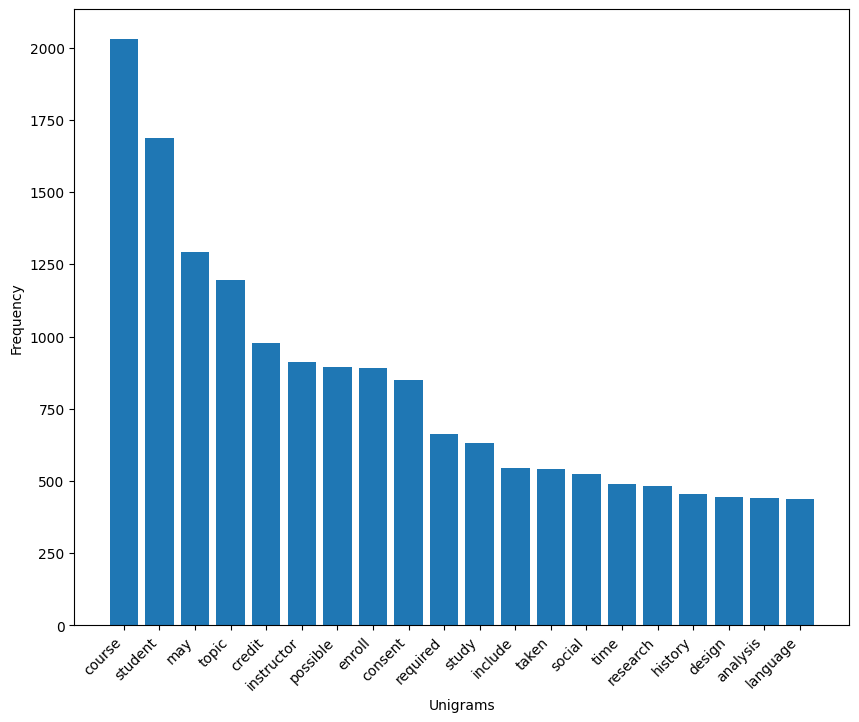

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
unigram_counter = Counter(dict_ngrams['unigram'])

# Get the 20 most common unigrams
most_common_unigrams = unigram_counter.most_common(20)

# Unzip the words and their frequencies
words, frequencies = zip(*most_common_unigrams)

# Create a bar plot
plt.figure(figsize=(10, 8)) # Adjust size as needed
plt.bar(words, frequencies)
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'enroll possible'),
  Text(1, 0, 'consent instructor'),
  Text(2, 0, 'instructor enroll'),
  Text(3, 0, 'may taken'),
  Text(4, 0, 'student may'),
  Text(5, 0, 'receive credit'),
  Text(6, 0, 'may receive'),
  Text(7, 0, 'upperdivision standing'),
  Text(8, 0, 'standing required'),
  Text(9, 0, 'topic include'),
  Text(10, 0, 'taken credit'),
  Text(11, 0, 'topic vary'),
  Text(12, 0, 'possible upperdivision'),
  Text(13, 0, 'course examines'),
  Text(14, 0, 'three time'),
  Text(15, 0, 'faculty member'),
  Text(16, 0, 'united state'),
  Text(17, 0, 'department approval'),
  Text(18, 0, 'approval required'),
  Text(19, 0, 'may repeated')])

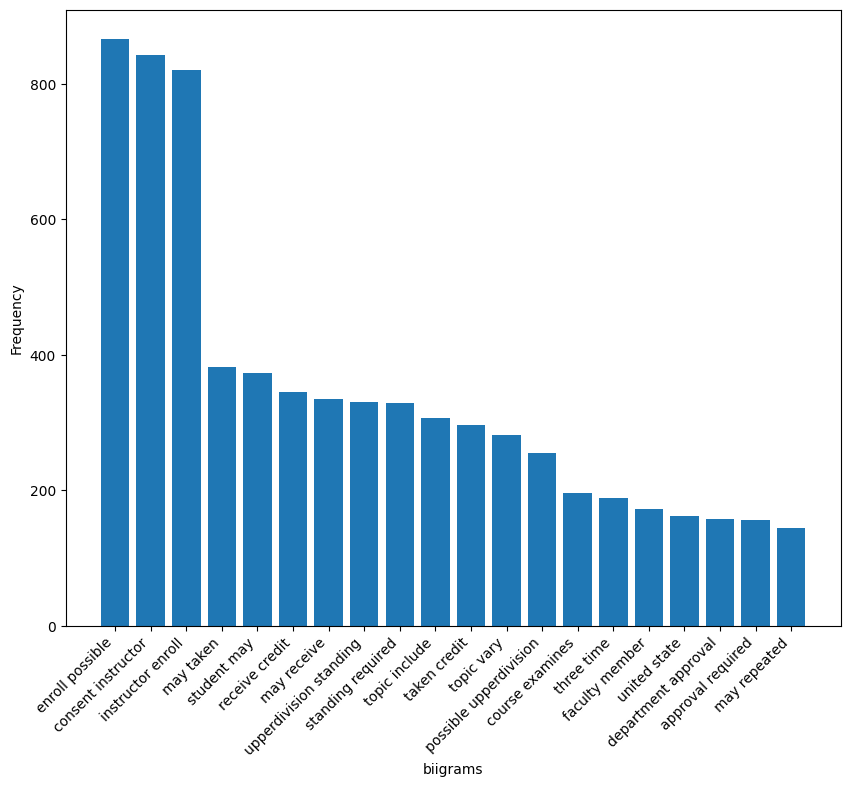

In [ ]:


# Unzip the words and their frequencies
bigram_counter = Counter(dict_ngrams['bigram'])
most_common_bigrams = bigram_counter.most_common(20)
words, frequencies = zip(*most_common_bigrams)

# Create a bar plot
plt.figure(figsize=(10, 8)) # Adjust size as needed
plt.bar(words, frequencies)
plt.xlabel('biigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'consent instructor enroll'),
  Text(1, 0, 'instructor enroll possible'),
  Text(2, 0, 'upperdivision standing required'),
  Text(3, 0, 'student may receive'),
  Text(4, 0, 'may receive credit'),
  Text(5, 0, 'may taken credit'),
  Text(6, 0, 'enroll possible upperdivision'),
  Text(7, 0, 'possible upperdivision standing'),
  Text(8, 0, 'department approval required'),
  Text(9, 0, 'credit three time'),
  Text(10, 0, 'fee may apply'),
  Text(11, 0, 'material fee may'),
  Text(12, 0, 'taken credit three'),
  Text(13, 0, 'may repeated credit'),
  Text(14, 0, 'program material fee'),
  Text(15, 0, 'credit two time'),
  Text(16, 0, 'taken credit two'),
  Text(17, 0, 'credit topic vary'),
  Text(18, 0, 'time topic vary'),
  Text(19, 0, 'vary quarter quarter')])

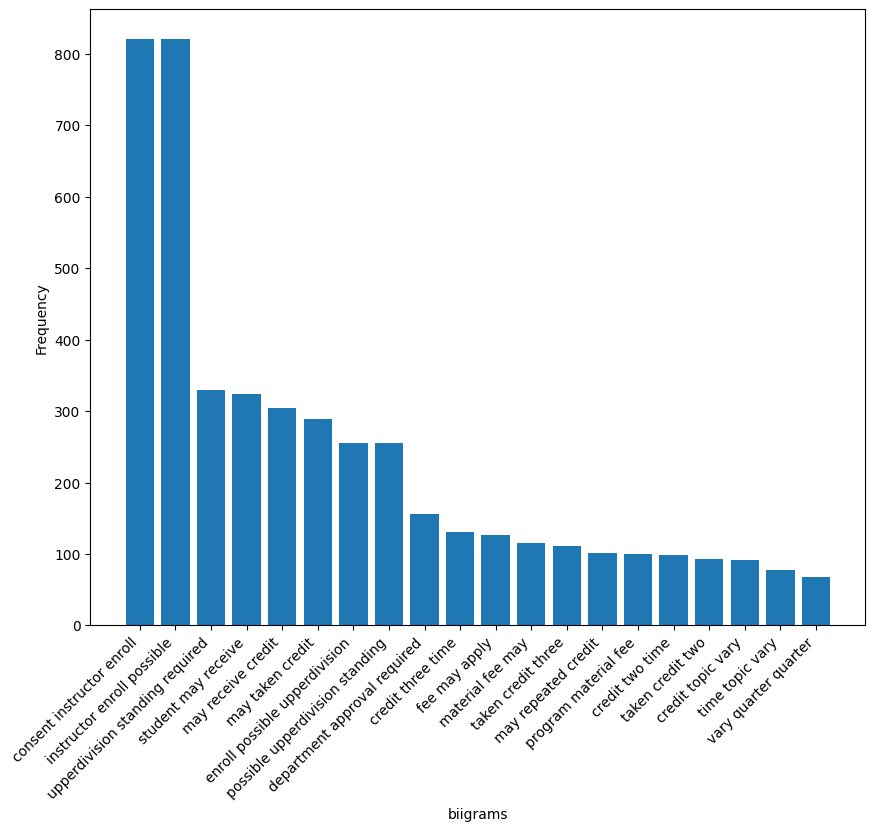

In [ ]:
# Unzip the words and their frequencies
trigram_counter = Counter(dict_ngrams['trigram'])
most_common_trigrams = trigram_counter.most_common(20)
words, frequencies = zip(*most_common_trigrams)

# Create a bar plot
plt.figure(figsize=(10, 8)) # Adjust size as needed
plt.bar(words, frequencies)
plt.xlabel('biigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")

In [ ]:
X = df[["Course", "Description"]]

# TF-IDF method

In [11]:

# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:


# Define STEM subject codes
stem_subjects = ['AESE', 'ANBI', 'ANAR', 'BENG', 'BGGN', 'BGRD', 'BGSE', 'BIBC', 'BICD', 'BIEB', 'BILD', 'BIMM', 
                 'BIOM', 'BIPN', 'BISP', 'BNFO', 'CENG', 'CHEM', 'CMM', 'COGS', 'CSE', 'DSC', 'DSE', 'ECE', 'ECON', 
                 'ENG', 'ESYS', 'MAE', 'MATH', 'MATS', 'MED', 'NANO', 'NEU', 'NEUG', 'PHYS', 'SE', 'SIO', 'SIOB', 
                 'SIOC', 'SIOG', 'SOMC', 'SOMI']

# Create the 'whether_STEM' column based on the 'Department' column
df['whether_STEM'] = df['Department'].apply(lambda x: 'STEM' if x in stem_subjects else 'non-STEM')

df.head()



Course Prerequisites                                        Name  \
0  PSYC 1            []                                  Psychology   
1  PSYC 2            []  General Psychology: Biological Foundations   
2  PSYC 3            []   General Psychology: Cognitive Foundations   
3  PSYC 4            []  General Psychology: Behavioral Foundations   
4  PSYC 6            []      General Psychology: Social Foundations   

                                         Description Department  Number  \
0  This course provides an overview of the basic ...       PSYC       1   
1  This course provides an introduction to the ba...       PSYC       2   
2  This course provides an introduction to behavi...       PSYC       3   
3  This course provides an introduction to social...       PSYC       4   
4  This course provides an introduction to theori...       PSYC       6   

   Level whether_STEM  
0  Lower     non-STEM  
1  Lower     non-STEM  
2  Lower     non-STEM  
3  Lower     non-STEM  
4  Lower     non-STEM

In [13]:

X = pd.DataFrame(df, columns=["Description"])
X

Description
0     This course provides an overview of the basic ...
1     This course provides an introduction to the ba...
2     This course provides an introduction to behavi...
3     This course provides an introduction to social...
4     This course provides an introduction to theori...
...                                                 ...
3816  Using the San Diego region as a case study, st...
3817  (Same as COGS 194, COMM 194, HITO 193, POLI 19...
3818  Introduction to teaching activities associated...
3819  Directed group study on a topic or in a field ...
3820  Reading and research programs and field-study ...

[3821 rows x 1 columns]

In [14]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

stopwords.words("english")[:100] # <-- import the english stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [15]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [16]:
X['cleaned'] = df['Description'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [17]:
X.head()

Description  \
0  This course provides an overview of the basic ...   
1  This course provides an introduction to the ba...   
2  This course provides an introduction to behavi...   
3  This course provides an introduction to social...   
4  This course provides an introduction to theori...   

                                             cleaned  
0  course provides overview basic concepts psycho...  
1  course provides introduction basic concepts co...  
2  course provides introduction behavioral psycho...  
3  course provides introduction social psychology...  
4  course provides introduction theories research...

In [18]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(X['cleaned'])

In [19]:
X.toarray().shape

(3821, 2872)

In [20]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=4, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [26]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters


In [ ]:
df['x0'] = x0
df['x1'] = x1

In [65]:
df

Course Prerequisites                                        Name  \
0      PSYC 1            []                                  Psychology   
1      PSYC 2            []  General Psychology: Biological Foundations   
2      PSYC 3            []   General Psychology: Cognitive Foundations   
3      PSYC 4            []  General Psychology: Behavioral Foundations   
4      PSYC 6            []      General Psychology: Social Foundations   
...       ...           ...                                         ...   
3816  USP 189            []            Special Topics in Urban Planning   
3817  USP 190            []                       Senior Honors Seminar   
3818  USP 191            []        GIS for Urban and Community Planning   
3819  USP 193            []                San Diego Community Research   
3820  USP 194            []          Research Seminar in Washington, DC   

                                            Description Department  Number  \
0     This course provides an overview of the basic ...       PSYC       1   
1     This course provides an introduction to the ba...       PSYC       2   
2     This course provides an introduction to behavi...       PSYC       3   
3     This course provides an introduction to social...       PSYC       4   
4     This course provides an introduction to theori...       PSYC       6   
...                                                 ...        ...     ...   
3816  Using the San Diego region as a case study, st...        USP     189   
3817  (Same as COGS 194, COMM 194, HITO 193, POLI 19...        USP     190   
3818  Introduction to teaching activities associated...        USP     191   
3819  Directed group study on a topic or in a field ...        USP     193   
3820  Reading and research programs and field-study ...        USP     194   

      Level whether_STEM  cluster        x0        x1  
0     Lower     non-STEM        3 -0.092875  0.012686  
1     Lower     non-STEM        3 -0.083742  0.009888  
2     Lower     non-STEM        3 -0.079835  0.024908  
3     Lower     non-STEM        3 -0.081567  0.042126  
4     Lower     non-STEM        3 -0.058050  0.002293  
...     ...          ...      ...       ...       ...  
3816  Upper     non-STEM        1  0.103253 -0.181019  
3817  Upper     non-STEM        3  0.084519  0.061270  
3818  Upper     non-STEM        1  0.130820 -0.083806  
3819  Upper     non-STEM        1  0.446617 -0.186664  
3820  Upper     non-STEM        1  0.255971 -0.283513  

[3821 rows x 11 columns]

In [34]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
topic,quarter,repeated,three,taken,times,credit,topics,may,vary

Cluster 1
students,faculty,upper,division,standing,required,possible,enroll,consent,instructor

Cluster 2
development,american,states,historical,examines,cultural,history,political,social,course

Cluster 3
data,methods,topics,introduction,may,analysis,research,design,course,students


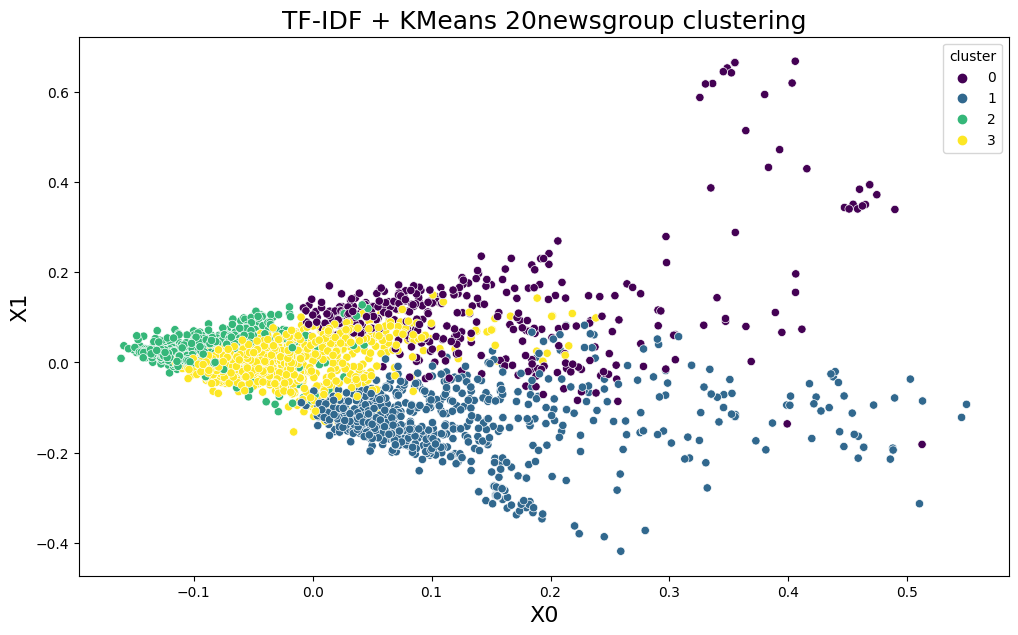

In [54]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

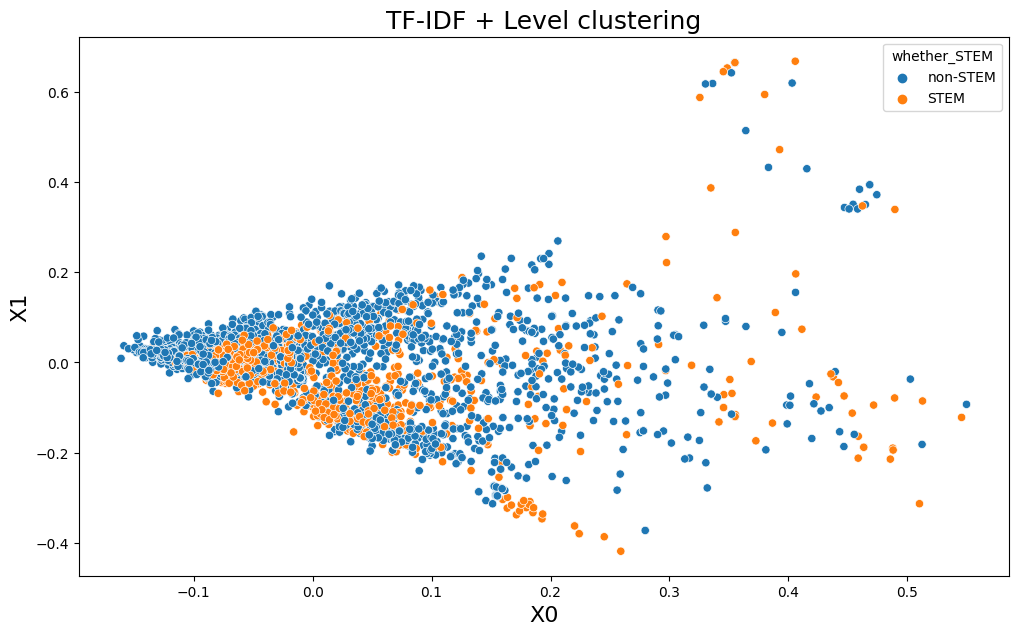

In [66]:
plt.figure(figsize=(12, 7))
plt.title("TF-IDF + Level clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='x0', y='x1', hue='whether_STEM')
plt.show()

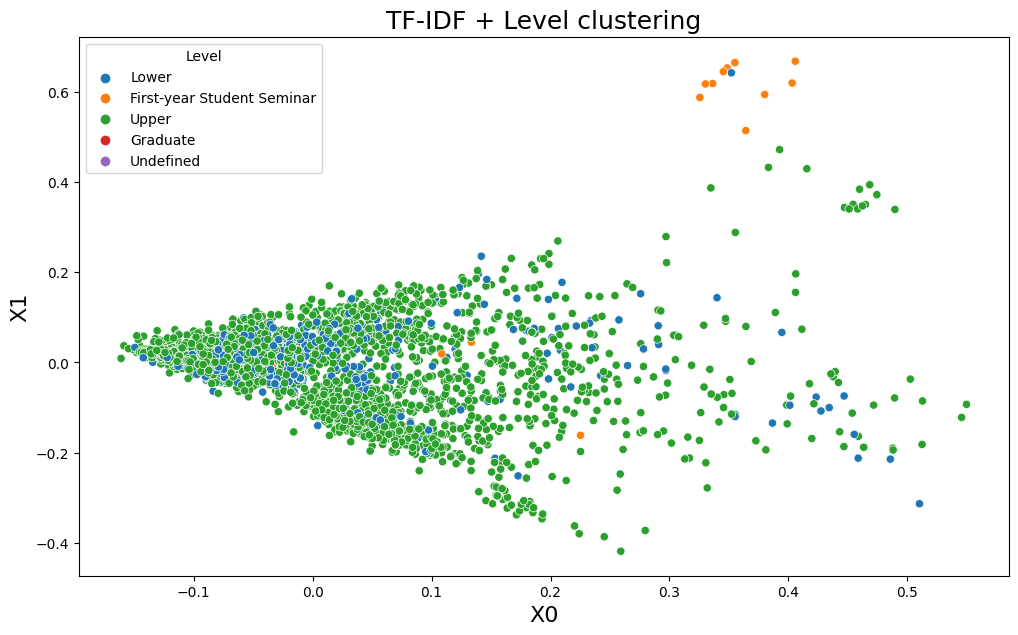

In [67]:
plt.figure(figsize=(12, 7))
plt.title("TF-IDF + Level clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='x0', y='x1', hue='Level')
plt.show()

## Plot with tSNE

In [2]:
X.toarray()

NameError: name 'X' is not defined

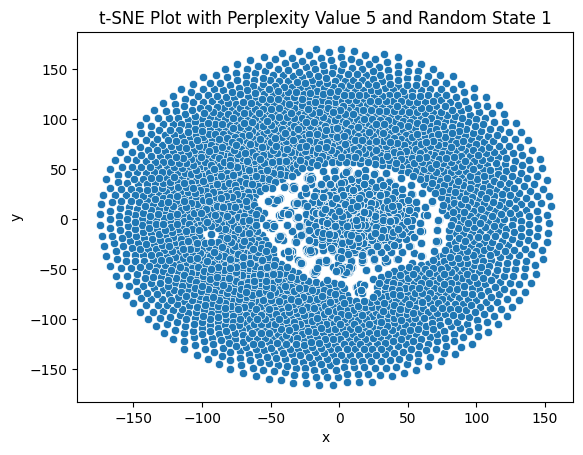

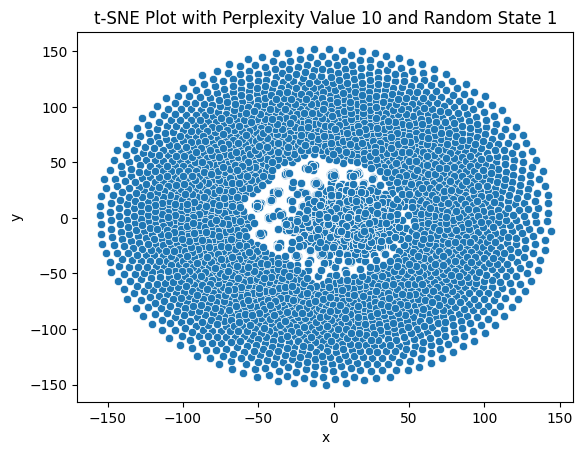

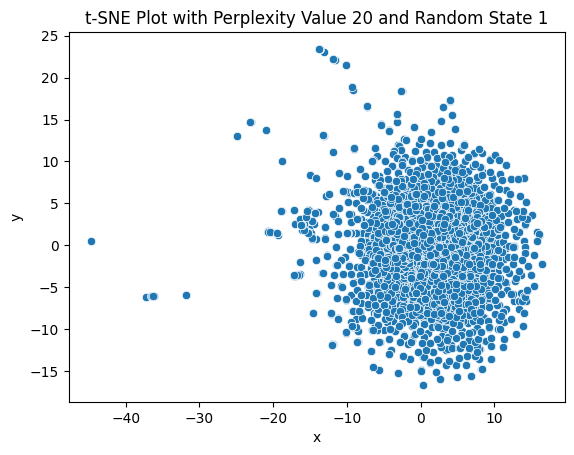

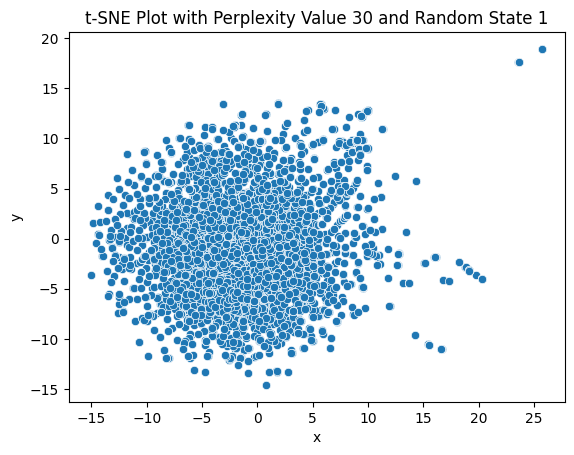

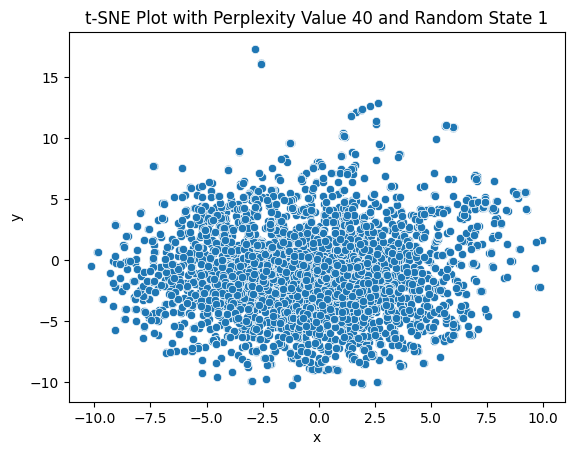

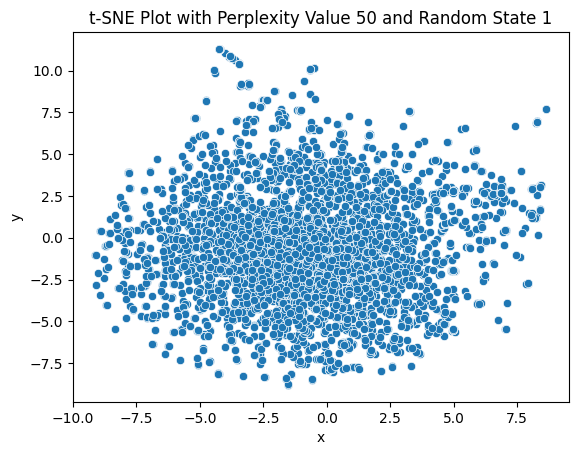

--------------------------------------------


In [21]:
from sklearn.manifold import TSNE
for perp in [5,10, 20, 30, 40, 50]:
    for rs in [1]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(X.toarray())
        df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x',y='y', data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
        plt.show()
print('--------------------------------------------')

In [23]:
tsne = TSNE(n_components=2, perplexity=50, random_state=2)
data_tsne = tsne.fit_transform(X.toarray())

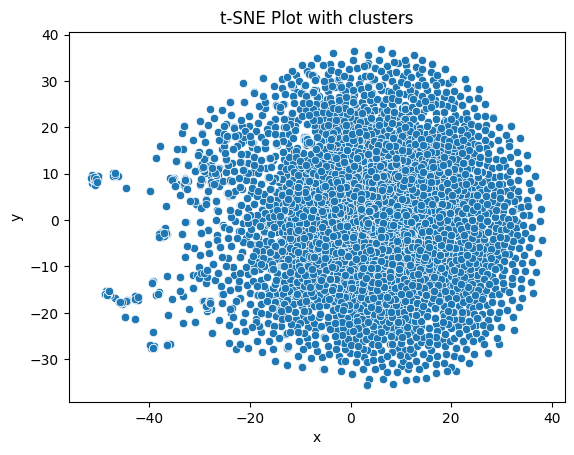

In [60]:
sns.scatterplot(x='x',y='y', data=df_combo)
plt.title('t-SNE Plot with clusters')
plt.show()

In [27]:
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'])
df_combo = pd.concat([df, df_tsne], axis=1)
df_combo.head()

Course Prerequisites                                        Name  \
0  PSYC 1            []                                  Psychology   
1  PSYC 2            []  General Psychology: Biological Foundations   
2  PSYC 3            []   General Psychology: Cognitive Foundations   
3  PSYC 4            []  General Psychology: Behavioral Foundations   
4  PSYC 6            []      General Psychology: Social Foundations   

                                         Description Department  Number  \
0  This course provides an overview of the basic ...       PSYC       1   
1  This course provides an introduction to the ba...       PSYC       2   
2  This course provides an introduction to behavi...       PSYC       3   
3  This course provides an introduction to social...       PSYC       4   
4  This course provides an introduction to theori...       PSYC       6   

   Level whether_STEM  cluster         x         y  
0  Lower     non-STEM        3  8.522717  4.323616  
1  Lower     non-STEM        3  7.827394  4.601628  
2  Lower     non-STEM        3  9.377891  4.492226  
3  Lower     non-STEM        3  9.285184  3.816745  
4  Lower     non-STEM        3  7.723207  3.407525

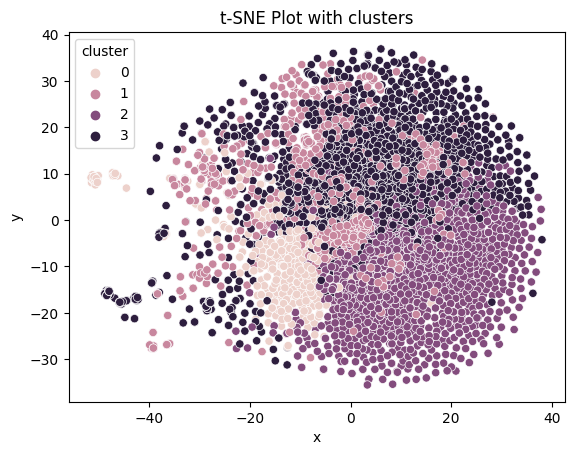

In [29]:
sns.scatterplot(x='x',y='y', hue = "cluster", data=df_combo)
plt.title('t-SNE Plot with clusters')
plt.show()

In [35]:
get_top_keywords(10)


Cluster 0
topic,quarter,repeated,three,taken,times,credit,topics,may,vary

Cluster 1
students,faculty,upper,division,standing,required,possible,enroll,consent,instructor

Cluster 2
development,american,states,historical,examines,cultural,history,political,social,course

Cluster 3
data,methods,topics,introduction,may,analysis,research,design,course,students


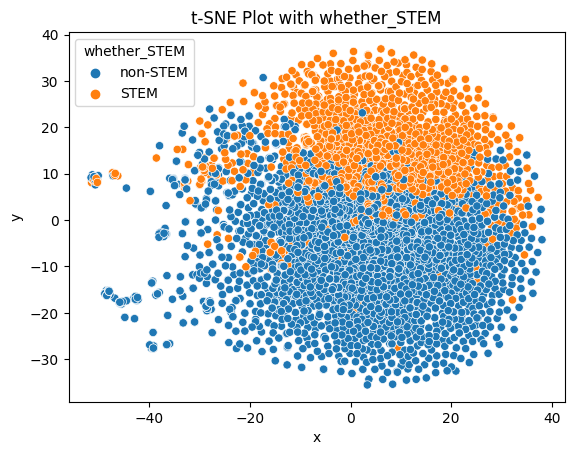

In [31]:
sns.scatterplot(x='x',y='y', hue = "whether_STEM", data=df_combo)
plt.title('t-SNE Plot with whether_STEM')
plt.show()

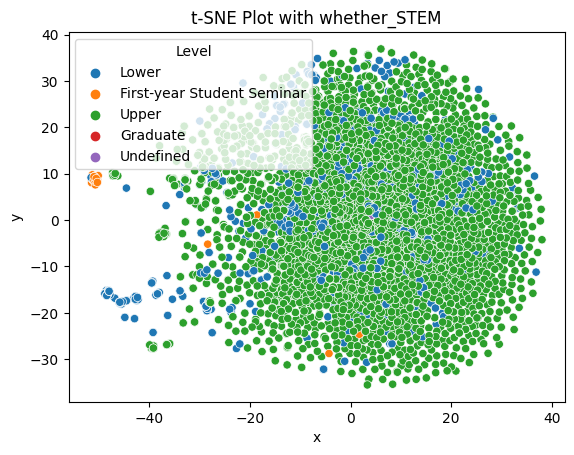

In [32]:
sns.scatterplot(x='x',y='y', hue = "Level", data=df_combo)
plt.title('t-SNE Plot with whether_STEM')
plt.show()

In [37]:
X.toarray().shape

(3821, 2872)

In [39]:
df.columns

Index(['Course', 'Prerequisites', 'Name', 'Description', 'Department',
       'Number', 'Level', 'whether_STEM', 'cluster'],
      dtype='object')

In [42]:

tfidf_matrix = X.toarray()



In [46]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_closest_courses(course_name):
    # Check if the course exists in the dataframe
    if course_name not in df['Course'].values:
        return "Course not found."
    
    # Get the index of the course in the dataframe
    course_index = df[df['Course'] == course_name].index[0]
    
    # Retrieve the TF-IDF vector for the specified course
    course_tfidf = tfidf_matrix[course_index]
    
    # Calculate the cosine similarity with all courses
    cosine_similarities = cosine_similarity(tfidf_matrix, course_tfidf.reshape(1, -1)).flatten()
    
    # Get the indices of the courses with the highest cosine similarity scores
    similar_courses_indices = np.argsort(-cosine_similarities)[1:6]  # Skip the first one as it will be the course itself
    
    # Retrieve the course details for the most similar courses
    similar_courses = df.iloc[similar_courses_indices][['Course', 'Name', 'Description']]
    
    return similar_courses




In [44]:
df['Course'].values

array(['PSYC 1', 'PSYC 2', 'PSYC 3', ..., 'USP 191', 'USP 193', 'USP 194'],
      dtype=object)

In [53]:
find_closest_courses('PSYC 3')

Course                                        Name  \
0        PSYC 1                                  Psychology   
19     PSYC 105                        Cognitive Psychology   
3        PSYC 4  General Psychology: Behavioral Foundations   
3201  COGS 101B             Learning, Memory, and Attention   
61     PSYC 153                       Psychology of Emotion   

                                                                                                                                                                                                                                                                           Description  
0                                                      This course provides an overview of the basic concepts in psychology. Topics may include human information processing, learning and memory, motivation, development, language acquisition, social psychology, and personality.   
19             This course provides a comprehensive overview of human and animal behavior from a neuroscience perspective. Topics include the functions and mechanisms of perception, motivation (sex, sleep, hunger, emotions), learning and memory, and motor control and movement.   
3                                                                     This course provides an introduction to social psychology. Topics may include emotion, aesthetics, behavioral medicine, person perception, attitudes and attitude change, and behavior in social organizations.   
3201                                                                                    A survey of the experimental study of learning, memory, and attention. Topics include conditioning, automaticity, divided attention, memory systems, and the nature of mental representation.   
61    The course provides an extension of learning principles to human behavior. Topics include broad implications of a behavioral perspective, applied behavior analysis, and applications of behavioral principles to clinical disorders and to normal behavior in varied settings.

In [56]:
find_closest_courses('SOCI 87')

Course                                    Name  \
3646   SIO 87                        Freshman Seminar   
1188  LTEN 87                        Freshman Seminar   
3020  ETHN 87                        Freshman Seminar   
3273  ENVR 87  Environmental Studies Freshman Seminar   
2442  VIS 100          Introduction to Public Culture   

                                                                                                                                                                                                                                                                                                                                                                                                  Description  
3646                                                                         The Freshman Seminar Program is designed to provide the new students with the opportunity to explore and intellectual topic with a faculty member in a small setting. Topics vary from quarter to quarter. Enrollment is limited to fifteen to twenty students, with preference given to entering freshmen. (P/NP grades only).   
1188  The Freshman Seminar Program is designed to provide new students with the opportunity to explore an intellectual topic with a faculty member in a small seminar setting. Freshman Seminars are offered in all campus departments and undergraduate colleges, and topics vary from quarter to quarter. Enrollment is limited to fifteen to twenty students, with preference given to entering freshmen.   
3020  The Freshman Seminar Program is designed to provide new students with the opportunity to explore an intellectual topic with a faculty member in a small seminar setting. Freshman Seminars are offered in all campus departments and undergraduate colleges, and topics vary from quarter to quarter. Enrollment is limited to fifteen to twenty students, with preference given to entering freshmen.   
3273  The Freshman Seminar Program is designed to provide new students with the opportunity to explore an intellectual topic with a faculty member in a small seminar setting. Freshman Seminars are offered in all campus departments and undergraduate colleges, and topics vary from quarter to quarter. Enrollment is limited to fifteen to twenty students, with preference given to entering freshmen.   
2442   The Freshman Seminar Program is designed to provide new students with the opportunity to explore an intellectual topic with a faculty member in a small seminar setting. Freshman Seminars are offered in all campus departments and undergraduate colleges, and topics vary from quarter to quarter. Enrollment is limited to fifteen to twenty students with preference given to entering freshmen.

In [57]:
find_closest_courses('SOCI 1')

Course  \
1652     SOCI 2   
1654    SOCI 20   
1743  SOCI 168E   
1653    SOCI 10   
1655    SOCI 30   

                                                                         Name  \
1652                                                     The Study of Society   
1654                                        Social Change in the Modern World   
1743                                                     Sociology of Science   
1653  American Society: Social Structure and Culture in the\n\t\t\t\t    U.S.   
1655                                         Science, Technology, and Society   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Description  
1652                                          A continuation of Sociology/L 1A. The focus here is on socialization processes, culture, social reproduction and social control, and collective action. As in 1A, materials include both theoretical statements and case studies. While 1B may be taken as an independent course, it is recommended that students take 1A and 1B in sequence, as the latter builds on the former. Will not receive credit for SOCI 2 and SOCL 1B.  
1654                                                                                                                                                  A survey of the major economic, political, and social forces that have shaped the contemporary world. The course will provide an introduction to theories of social change, as well as prepare the student for upper-division work in comparative-historical sociology. Will not receive credit for SOCI 20 and SOCL 20.   
1743                                                                                                                                                                                    A survey of theoretical and empirical studies concerning the workings of the scientific community and its relations with the wider society. Special attention will be given to the institutionalization of the scientific role and to the social constitution of scientific knowledge.   
1653  An introduction to American society in historical, comparative,\n                  and contemporary perspectives. Topics will include American\n                  cultural traditions; industrialization; class structure; the\n                  welfare state; ethnic, racial, and gender relations; the changing\n                  position of religion; social movements; and political trends.\n                  Will not receive credit for SOCI 10 and SOCL 10.   
1655                                                                                                                                                            A series of case studies of the relations between society and modern science, technology, and medicine. Global warming, reproductive medicine, AIDS, and other topical cases prompt students to view science-society interactions as problematic and complex. Will not receive credit for SOCI 30 and SOCL 30.

In [59]:
# A course about machine learning
find_closest_courses('CSE 151A')

Course  \
3254   COGS 188   
3213  COGS 118A   
221     ECE 174   
3214  COGS 118B   
3599   CSE 152A   

                                                                     Name  \
3254                                  Artificial Intelligence Algorithms    
3213                              Supervised Machine Learning Algorithms    
221   Introduction to Linear and Nonlinear Optimization with Applications   
3214                                 Introduction to Machine Learning II    
3599                                    Introduction to Computer Vision I   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Description  
3254                                                                                                                                                                                                                                                                        This class will cover a broad spectrum of machine learning algorithms. It builds on students’ previous exposure to machine learning. It covers new artificial intelligence algorithms ranging from topic models as used in the text data analysis to genetic algorithms.   
3213                                                                                                                                                                                      This course introduces the mathematical formulations and algorithmic implementations of the core supervised machine learning methods. Topics in 118A include regression, nearest neighborhood, decision tree, support vector machine, and ensemble classifiers. COGS 118A-B may be taken in either order.   ** Consent of instructor to enroll possible  **  
221                                                                                                                                                                                                                   Introduction to pattern recognition and machine\n\t\t\t\t  learning. Decision functions. Statistical pattern classifiers. Generative\n\t\t\t\t  vs. discriminant methods for pattern classification. Feature selection.\n\t\t\t\t  Regression. Unsupervised learning. Clustering. Applications of machine\n\t\t\t\t  learning.   
3214                                                                                                                                                                                                            This course, with COGS 118A, forms a rigorous introduction to machine learning. Topics in 118B include maximum likelihood estimation, Bayesian parameter estimation, clustering, principal component analysis, and some application areas. COGS 118A-B may be taken in either order.  ** Consent of instructor to enroll possible  **  
3599  This course provides a broad introduction to the foundations, algorithms, and applications of computer vision. It introduces classical models and contemporary methods, from image formation models to deep learning, to address problems of 3-D reconstruction and object recognition from images and video. Topics include filtering, feature detection, stereo vision, structure from motion, motion estimation, and recognition. Programming assignments will be in Python. Students may not receive credit for both CSE 152A and CSE 152.

In [61]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
X.shape

(3821, 2872)